In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class PID:
    def __init__(self):
        self.Kp = 0
        self.Kd = 0
        self.Ki = 0
        self.Initialize()

    def SetKp(self,invar):
        self.Kp = invar

    def SetKi(self,invar):
        self.Ki = invar

    def SetKd(self,invar):
        self.Kd = invar

    def SetPrevError(self,preverror):
        self.prev_error = preverror

    def Initialize(self):
        self.currtime = time.time()
        self.prevtime = self.currtime

        self.prev_error = 0

        self.Cp = 0
        self.Ci = 0
        self.Cd = 0

    def GenOut(self,error):
        self.currtime = time.time()
        dt = self.currtime - self.prevtime
        de = error - self.prev_error

        self.Cp = self.Kp*error
        self.Ci += error*dt

        self.Cd = 0
        if dt > 0:
            self.Cd = de/dt

        self.prevtime = self.currtime
        self.prev_error = error

        return self.Cp + (self.Ki*self.Ci) + (self.Kd*self.Cd)

In [108]:
kp = 0.5
kd = 0
ki = 0

In [109]:
# 
pid = PID()
pid.SetKp(kp)
pid.SetKd(kd)
pid.SetKi(ki)

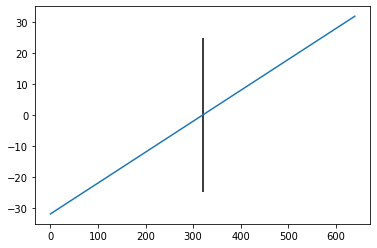

In [112]:
# 
err = np.linspace(0,640,100)
err_ad = (err - 320)/5
err_ad

out = pid.GenOut(err_ad)
plt.plot(err,out)
plt.vlines(320,ymin=-25,ymax = 25)